In [ ]:
#Importação das bibliotecas
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
import tensorflow
from numpy.random import seed
tensorflow.random.set_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
## Carregando todos os comentários como uma lista 
curr_dir = './input/'
all_headlines = []

for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        with open(curr_dir + filename, 'r') as f:
            lines = f.readlines()
            for line_num, line in enumerate(lines):
                try:
                    fields = line.split(',')
                    headline = fields[0]
                    if headline != "Unknown":
                        all_headlines.append(headline)
                except Exception as e:
                    print(f"Error in file {filename} on line {line_num}: {e}")
print("Número de manchetes:", len(all_headlines))

Número de manchetes: 9551


In [ ]:
#Limpeza de dados. Essa função pega um único título por vez e retorna o título limpo.
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

['comentarionotadata\n',
 'o parque  lindo fizemos a trilha dos saltos amarela  possvel fazer sem guia',
 'impossvel descrever com palavras oq s presencialmente se vivncia o guia chico 62 981150774',
 'eu fiz a trilha vermelha e o visual  de tirar o flego',
 'um lugar lindo',
 'um dia em alto paraiso de goias',
 'o parque  bem famoso mas no tem muita acessibilidade para cadeirantes ou qualquer outra pessoa com comorbidade',
 'na minha opinio no tem como a pessoa vir ate a chapada e no conhecer o parque nacional logo na entrada podemos escolher entre 3 ou 4 trilhas',
 'o parque no informa que no perodo sem chuvas o canions ficam secos e somente com gua parada para banhoa trilha vermelha cariocascanions no deve ser feita em tempo de seca',
 'espetacular parque com trilhas que nos trazem a ns mesmos e visuais de tirar o flego oportunidade de contato com a natureza intocada e selvagem do cerrado da ate para banhos']

In [ ]:
#Crias sequências de n-gramas de palavras a partir de um corpus de texto e retornar essas sequências e o número total de palavras no corpus.
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[4, 18],
 [4, 18, 60],
 [4, 18, 60, 93],
 [4, 18, 60, 93, 2],
 [4, 18, 60, 93, 2, 34],
 [4, 18, 60, 93, 2, 34, 11],
 [4, 18, 60, 93, 2, 34, 11, 82],
 [4, 18, 60, 93, 2, 34, 11, 82, 559],
 [4, 18, 60, 93, 2, 34, 11, 82, 559, 163],
 [4, 18, 60, 93, 2, 34, 11, 82, 559, 163, 78]]

In [ ]:
#Gera sequências de entrada padronizadas para um modelo de aprendizado de máquina, com base em sequências de tokens de texto pré-processadas. def generate_padded_sequences(input_sequences):
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
#A função cria um modelo de rede neural LSTM para gerar texto a partir de um corpus de comentarios limpas.
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 110, 10)           93860     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 9386)              947986    
                                                                 
Total params: 1,086,246
Trainable params: 1,086,246
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Treinando o modelo
history = model.fit(predictors, label, epochs=50, batch_size=256, verbose=5)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [ ]:
#Essa função recebe um texto inicial e um modelo treinado de redes neurais e gera um texto com um número específico de palavras preditas pelo modelo a partir do texto inicial.
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
#A função "generate_text" gera um texto preditivo baseado em um texto inicial (seed_text) 
import tensorflow as tf

def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = tf.argmax(predicted_probs, axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text.title()

In [ ]:
#Gera um texto com base em uma sequência inicial de palavras, usando um modelo de rede neural treinado para prever a próxima palavra com base nas palavras anteriores.
print (generate_text("O mercado do veropeso e", 12, model, max_sequence_len))
print (generate_text("O parque da chapada dos veadeiros e", 8, model, max_sequence_len))
print (generate_text("O parque jalapao", 10, model, max_sequence_len))
print (generate_text("A praca dos 3 poderes",16, model, max_sequence_len))

O Mercado Do Veropeso E Um Mercado De Belm E No Pode Deixar De Visitar O Mercado
O Parque Da Chapada Dos Veadeiros E No Tem Muita Coisa Para Conhecer O Mercado
O Parque Jalapao Nacional Da Chapada Dos Veadeiros Um Lugar Muito Bonito E
A Praca Dos 3 Poderes Um Lugar Muito Bonito E Com Muitas Opes De Frutas E Legumes Que Se Pode Fazer


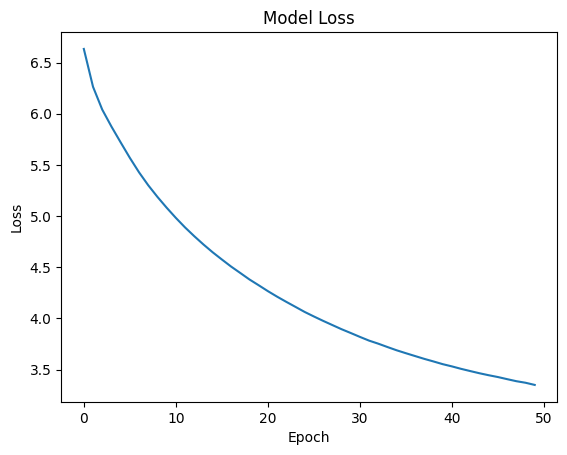

In [ ]:
#plotando o gráfico perca loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()